# Import the Libraries

In [1]:
import math # to perform math operation
import os # to manipulate system path
import numpy as np # to manipulate arrays
import matplotlib.pyplot as plt # for visualization
import tensorflow as tf # for tensor operations
from tensorflow import keras # for deep learning
from functools import partial # create a thin wrapper for any callable, with some default argument values

# Xavier and He Initialization

In [2]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

If we want He initialization with a uniform distribution but based on
fan avg rather than fan in , we can use the `VarianceScaling` initializer like
this:

In [4]:
he_avg_init = keras.initializers.VarianceScaling(scale=2, mode="fan_avg", distribution="uniform")
keras.layers.Dense(10, activation="relu", kernel_initializer=he_avg_init)

# Nonsaturating Activation Functions

In [5]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [6]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

Let's train a neural network on Fashion MNIST using the Leaky ReLU:

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 1.2734 - accuracy: 0.6016 - val_loss: 0.8934 - val_accuracy: 0.7016
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8104 - accuracy: 0.7289 - val_loss: 0.7232 - val_accuracy: 0.7568
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6965 - accuracy: 0.7678 - val_loss: 0.6470 - val_accuracy: 0.7914
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6356 - accuracy: 0.7881 - val_loss: 0.6003 - val_accuracy: 0.8052
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5950 - accuracy: 0.8011 - val_loss: 0.5698 - val_accuracy: 0.8132
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5659 - accuracy: 0.8109 - val_loss: 0.5431 - val_accuracy: 0.8214
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5439 - accuracy: 0.8164 - val_loss: 0.5234 - val_accuracy



Now let's try PReLU:


In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 1.3860 - accuracy: 0.6016 - val_loss: 0.9335 - val_accuracy: 0.7182
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8322 - accuracy: 0.7416 - val_loss: 0.7408 - val_accuracy: 0.7698
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7058 - accuracy: 0.7768 - val_loss: 0.6582 - val_accuracy: 0.7956
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6393 - accuracy: 0.7953 - val_loss: 0.6097 - val_accuracy: 0.8084
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5959 - accuracy: 0.8067 - val_loss: 0.5712 - val_accuracy: 0.8160
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5646 - accuracy: 0.8142 - val_loss: 0.5439 - val_accuracy: 0.8254
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5409 - accuracy: 0.8194 - val_loss: 0.5283 - val_accuracy



Let's create a neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function:


In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(99):
  model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])



Now let's train it. Do not forget to scale the inputs to mean 0 and standard deviation 1:


In [11]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [12]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 35s 19ms/step - loss: 0.9724 - accuracy: 0.6419 - val_loss: 0.7028 - val_accuracy: 0.7464
Epoch 2/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.6396 - accuracy: 0.7719 - val_loss: 0.5851 - val_accuracy: 0.8016
Epoch 3/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.5448 - accuracy: 0.8098 - val_loss: 0.5524 - val_accuracy: 0.8182
Epoch 4/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.4933 - accuracy: 0.8317 - val_loss: 0.4990 - val_accuracy: 0.8264
Epoch 5/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.4590 - accuracy: 0.8424 - val_loss: 0.4638 - val_accuracy: 0.8458


Now look at what happens if we try to use the ReLU activation function instead:

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 33s 17ms/step - loss: 2.0636 - accuracy: 0.1894 - val_loss: 1.8489 - val_accuracy: 0.2596
Epoch 2/5
1719/1719 [==============================] - 29s 17ms/step - loss: 1.4803 - accuracy: 0.4201 - val_loss: 1.1072 - val_accuracy: 0.5640
Epoch 3/5
1719/1719 [==============================] - 28s 16ms/step - loss: 1.2265 - accuracy: 0.5046 - val_loss: 0.9833 - val_accuracy: 0.6072
Epoch 4/5
1719/1719 [==============================] - 28s 16ms/step - loss: 0.9421 - accuracy: 0.6206 - val_loss: 0.7622 - val_accuracy: 0.7236
Epoch 5/5
1719/1719 [==============================] - 28s 16ms/step - loss: 0.8463 - accuracy: 0.6902 - val_loss: 0.9315 - val_accuracy: 0.6408


Not great at all, we suffered from the vanishing/exploding gradients problem.

# Implementing Batch Normalization with Keras

In [14]:
model = keras.models.Sequential([
                  keras.layers.Flatten(input_shape=(28, 28)),
                  keras.layers.BatchNormalization(),
                  keras.layers.Dense(300, activation="relu"),
                  keras.layers.BatchNormalization(),
                  keras.layers.Dense(100, activation="relu"),
                  keras.layers.BatchNormalization(),
                  keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_210 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_211 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [16]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.8628 - accuracy: 0.7098 - val_loss: 0.5603 - val_accuracy: 0.8124
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5794 - accuracy: 0.8009 - val_loss: 0.4805 - val_accuracy: 0.8360
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5197 - accuracy: 0.8190 - val_loss: 0.4413 - val_accuracy: 0.8496
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4873 - accuracy: 0.8299 - val_loss: 0.4203 - val_accuracy: 0.8550
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4640 - accuracy: 0.8365 - val_loss: 0.4015 - val_accuracy: 0.8634
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4415 - accuracy: 0.8449 - val_loss: 0.3893 - val_accuracy: 0.8660
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4265 - accuracy: 0.8490 - val_loss: 0.3814 - val_ac

Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer has some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

In [18]:
model = keras.models.Sequential([
                  keras.layers.Flatten(input_shape=[28, 28]),
                  keras.layers.BatchNormalization(),
                  keras.layers.Dense(300, use_bias=False),
                  keras.layers.BatchNormalization(),
                  keras.layers.Activation("relu"),
                  keras.layers.Dense(100, use_bias=False),
                  keras.layers.BatchNormalization(),
                  keras.layers.Activation("relu"),
                  keras.layers.Dense(10, use_bias=False),
                  keras.layers.BatchNormalization(),
                  keras.layers.Activation("softmax"),
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 1.1693 - accuracy: 0.6673 - val_loss: 0.8245 - val_accuracy: 0.7826
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8784 - accuracy: 0.7675 - val_loss: 0.6931 - val_accuracy: 0.8132
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7828 - accuracy: 0.7896 - val_loss: 0.6189 - val_accuracy: 0.8320
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7199 - accuracy: 0.8017 - val_loss: 0.5668 - val_accuracy: 0.8416
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.6768 - accuracy: 0.8066 - val_loss: 0.5303 - val_accuracy: 0.8492
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.6395 - accuracy: 0.8160 - val_loss: 0.5054 - val_accuracy: 0.8522
Epoch 7/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.6150 - accuracy: 0.8192 - val_loss: 0.4823 - val_ac

# Gradient Clipping



All Keras optimizers accept `clipnorm` or `clipvalue` arguments:


In [19]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [20]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Transfer Learning with Keras

## Reusing a Keras model

Let's split the fashion MNIST training set in two:

* `X_train_A`: all images of all items except for sandals and shirts (classes 5 and 6).
* `X_train_B`: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).


In [21]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [22]:
X_train_A.shape

(43986, 28, 28)

In [23]:
X_train_B.shape

(200, 28, 28)

In [24]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [25]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [26]:
tf.random.set_seed(42)
np.random.seed(42)

In [27]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.5927 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8667
Epoch 2/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3289 - val_accuracy: 0.8824
Epoch 3/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3170 - accuracy: 0.8896 - val_loss: 0.3014 - val_accuracy: 0.8989
Epoch 4/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2973 - accuracy: 0.8975 - val_loss: 0.2894 - val_accuracy: 0.9021
Epoch 5/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2835 - accuracy: 0.9022 - val_loss: 0.2776 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2729 - accuracy: 0.9061 - val_loss: 0.2735 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2641 - accuracy: 0.9093 - val_loss: 0.2720 - val_accuracy:

In [28]:
model_A.save("my_model_A.h5")

In [29]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 47ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 32ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 32ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 19ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 32ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 19ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 31ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [30]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_222 (Dense)           (None, 300)               235500    
                                                                 
 dense_223 (Dense)           (None, 100)               30100     
                                                                 
 dense_224 (Dense)           (None, 50)                5050      
                                                                 
 dense_225 (Dense)           (None, 50)                2550      
                                                                 
 dense_226 (Dense)           (None, 50)                2550      
                                                                 
 dense_227 (Dense)           (None, 1)                

In [31]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))



Note that `model_B_on_A` and `model_A` actually share layers now, so when we train one, it will update both models. If we want to avoid that, we need to build `model_B_on_A` on top of a clone of `model_A`:


In [32]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

Now freeze the reused layers
during the first few epochs, giving the new layer some time to learn
reasonable weights.

In [33]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

Now we can train the model for a few epochs, then unfreeze the reused
layers (which requires compiling the model again) and continue training to
fine-tune the reused layers for task B. After unfreezing the reused layers, it
is usually a good idea to reduce the `learning rate`, once again to avoid
damaging the reused weights:

In [34]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=1e-4) # the default lr is 1e-2
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=optimizer,
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 45ms/step - loss: 0.2632 - accuracy: 0.9400 - val_loss: 0.2779 - val_accuracy: 0.9270
Epoch 2/4
7/7 [==============================] - 0s 30ms/step - loss: 0.2536 - accuracy: 0.9400 - val_loss: 0.2685 - val_accuracy: 0.9300
Epoch 3/4
7/7 [==============================] - 0s 16ms/step - loss: 0.2444 - accuracy: 0.9400 - val_loss: 0.2599 - val_accuracy: 0.9351
Epoch 4/4
7/7 [==============================] - 0s 16ms/step - loss: 0.2360 - accuracy: 0.9400 - val_loss: 0.2518 - val_accuracy: 0.9381
Epoch 1/16
7/7 [==============================] - 1s 57ms/step - loss: 0.2288 - accuracy: 0.9400 - val_loss: 0.2461 - val_accuracy: 0.9381
Epoch 2/16
7/7 [==============================] - 0s 19ms/step - loss: 0.2230 - accuracy: 0.9450 - val_loss: 0.2405 - val_accuracy: 0.9422
Epoch 3/16
7/7 [==============================] - 0s 18ms/step - loss: 0.2174 - accuracy: 0.9450 - val_loss: 0.2352 - val_accuracy: 0.9432
Epoch 4/16
7/7 [===============

In [35]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [36]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1783 - accuracy: 0.9735


[0.17831698060035706, 0.9735000133514404]


# Faster Optimizers
## Momentum optimization

In [37]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

## Nesterov Accelerated Gradient

In [38]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [39]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

## RMSProp

In [40]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

## Adam Optimization

In [41]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Adamax Optimization

In [42]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [43]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


# Learning Rate Scheduling
## Power Scheduling

`lr = lr0 / (1 + steps / s)**c`

* Keras uses `c=1` and `s = 1 / decay`



In [44]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [45]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4898 - accuracy: 0.8265 - val_loss: 0.4063 - val_accuracy: 0.8608
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3792 - accuracy: 0.8655 - val_loss: 0.3729 - val_accuracy: 0.8718
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3467 - accuracy: 0.8774 - val_loss: 0.3747 - val_accuracy: 0.8720
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3259 - accuracy: 0.8845 - val_loss: 0.3512 - val_accuracy: 0.8780
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3107 - accuracy: 0.8897 - val_loss: 0.3449 - val_accuracy: 0.8788
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2972 - accuracy: 0.8940 - val_loss: 0.3419 - val_accuracy: 0.8844
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2871 - accuracy: 0.8981 - val_loss: 0.3379 - val_accuracy:

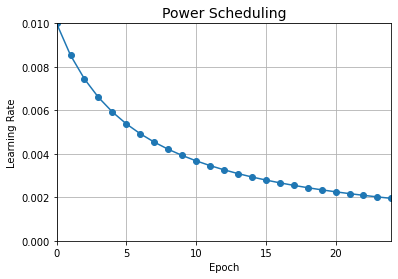

In [46]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()


## Exponential Scheduling

`lr = lr0 * 0.1**(epoch / s)`


In [47]:
def exponential_decay_fn(epoch):
  return 0.01 * 0.1**(epoch / 20)

In [48]:
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1**(epoch / s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

In [49]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

n_epochs = 25

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8566 - accuracy: 0.7552 - val_loss: 0.8053 - val_accuracy: 0.7670 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7229 - accuracy: 0.7798 - val_loss: 0.7611 - val_accuracy: 0.7492 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5840 - accuracy: 0.8172 - val_loss: 0.7166 - val_accuracy: 0.7696 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5428 - accuracy: 0.8329 - val_loss: 0.5661 - val_accuracy: 0.8382 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4897 - accuracy: 0.8467 - val_loss: 0.7592 - val_accuracy: 0.7672 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4553 - accuracy: 0.8578 - val_loss: 0.4661 - val_accuracy: 0.8608 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================

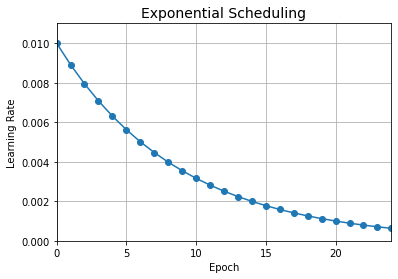

In [50]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()



The schedule function can take the current learning rate as a second argument:


In [51]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)



If we want to update the learning rate at each iteration rather than at each epoch, we must write we own callback class:


In [52]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 15s 8ms/step - loss: 0.8082 - accuracy: 0.7620 - val_loss: 0.9582 - val_accuracy: 0.7690 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6669 - accuracy: 0.7979 - val_loss: 0.5285 - val_accuracy: 0.8336 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6080 - accuracy: 0.8151 - val_loss: 0.8994 - val_accuracy: 0.7156 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5005 - accuracy: 0.8413 - val_loss: 0.4545 - val_accuracy: 0.8598 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4673 - accuracy: 0.8531 - val_loss: 0.4943 - val_accuracy: 0.8620 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4218 - accuracy: 0.8659 - val_loss: 0.4853 - val_accuracy: 0.8660 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================

In [53]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

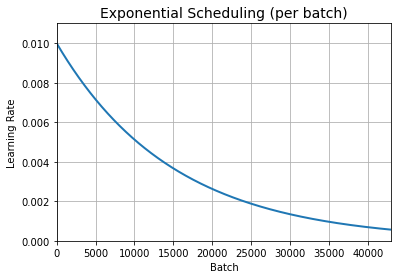

In [54]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

## Piecewise Constant Scheduling

In [55]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [56]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [57]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 14s 7ms/step - loss: 0.8369 - accuracy: 0.7566 - val_loss: 0.8026 - val_accuracy: 0.7464 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.8054 - accuracy: 0.7678 - val_loss: 0.8051 - val_accuracy: 0.7840 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9554 - accuracy: 0.7198 - val_loss: 1.5560 - val_accuracy: 0.5516 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 12s 7ms/step - loss: 1.0785 - accuracy: 0.6704 - val_loss: 0.9651 - val_accuracy: 0.6364 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 13s 7ms/step - loss: 1.0249 - accuracy: 0.6683 - val_loss: 1.1693 - val_accuracy: 0.6470 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7260 - accuracy: 0.7377 - val_loss: 0.6760 - val_accuracy: 0.7602 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================

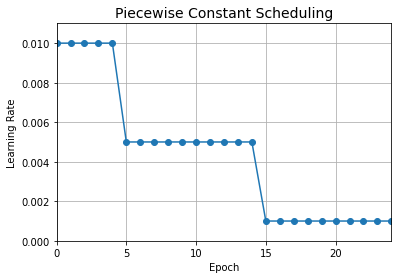

In [58]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Performance Scheduling

In [59]:
tf.random.set_seed(42)
np.random.seed(42)

In [60]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5908 - accuracy: 0.8070 - val_loss: 0.4863 - val_accuracy: 0.8474 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4939 - accuracy: 0.8393 - val_loss: 0.6034 - val_accuracy: 0.8374 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5016 - accuracy: 0.8439 - val_loss: 0.4986 - val_accuracy: 0.8544 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5030 - accuracy: 0.8486 - val_loss: 0.5206 - val_accuracy: 0.8588 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5136 - accuracy: 0.8504 - val_loss: 0.4708 - val_accuracy: 0.8560 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5028 - accuracy: 0.8559 - val_loss: 0.5840 - val_accuracy: 0.8518 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 8s

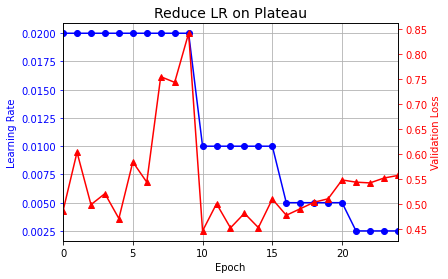

In [61]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()


## tf.keras schedulers

In [62]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4894 - accuracy: 0.8273 - val_loss: 0.4096 - val_accuracy: 0.8604
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3820 - accuracy: 0.8651 - val_loss: 0.3740 - val_accuracy: 0.8708
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3486 - accuracy: 0.8763 - val_loss: 0.3730 - val_accuracy: 0.8684
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3264 - accuracy: 0.8838 - val_loss: 0.3492 - val_accuracy: 0.8802
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3103 - accuracy: 0.8896 - val_loss: 0.3428 - val_accuracy: 0.8794
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2957 - accuracy: 0.8952 - val_loss: 0.3410 - val_accuracy: 0.8822
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2853 - accuracy: 0.8988 - val_loss: 0.3352 - val_accuracy:

## 1Cycle scheduling

In [63]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [64]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 4s 8ms/step - loss: nan - accuracy: 0.3855


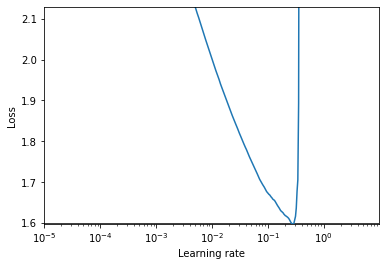

In [65]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [66]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [67]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 4s 8ms/step - loss: 0.6572 - accuracy: 0.7739 - val_loss: 0.4872 - val_accuracy: 0.8336
Epoch 2/25
430/430 [==============================] - 4s 8ms/step - loss: 0.4581 - accuracy: 0.8396 - val_loss: 0.4275 - val_accuracy: 0.8522
Epoch 3/25
430/430 [==============================] - 4s 8ms/step - loss: 0.4122 - accuracy: 0.8547 - val_loss: 0.4114 - val_accuracy: 0.8584
Epoch 4/25
430/430 [==============================] - 4s 8ms/step - loss: 0.3837 - accuracy: 0.8643 - val_loss: 0.3870 - val_accuracy: 0.8684
Epoch 5/25
430/430 [==============================] - 4s 8ms/step - loss: 0.3640 - accuracy: 0.8718 - val_loss: 0.3765 - val_accuracy: 0.8684
Epoch 6/25
430/430 [==============================] - 3s 8ms/step - loss: 0.3457 - accuracy: 0.8775 - val_loss: 0.3746 - val_accuracy: 0.8710
Epoch 7/25
430/430 [==============================] - 3s 8ms/step - loss: 0.3330 - accuracy: 0.8812 - val_loss: 0.3636 - val_accuracy: 0.8716
Epoch 


# Avoiding Overfitting Through Regularization
## $l1$ and $l2$ regularization

In [68]:
layer = keras.layers.Dense(300, activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [69]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 16s 9ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 15s 9ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


In [70]:
RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 16s 9ms/step - loss: 1.6313 - accuracy: 0.8113 - val_loss: 0.7218 - val_accuracy: 0.8310
Epoch 2/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7187 - accuracy: 0.8273 - val_loss: 0.6826 - val_accuracy: 0.8382


## Dropout

In [71]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5838 - accuracy: 0.7997 - val_loss: 0.3730 - val_accuracy: 0.8644
Epoch 2/2
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4209 - accuracy: 0.8443 - val_loss: 0.3396 - val_accuracy: 0.8714



## Alpha Dropout

In [72]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6654 - accuracy: 0.7594 - val_loss: 0.6056 - val_accuracy: 0.8412
Epoch 2/20
1719/1719 [==============================] - 9s 6ms/step - loss: 0.5590 - accuracy: 0.7946 - val_loss: 0.5543 - val_accuracy: 0.8496
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5263 - accuracy: 0.8062 - val_loss: 0.5000 - val_accuracy: 0.8554
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5050 - accuracy: 0.8123 - val_loss: 0.4488 - val_accuracy: 0.8662
Epoch 5/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4942 - accuracy: 0.8176 - val_loss: 0.4598 - val_accuracy: 0.8590
Epoch 6/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4816 - accuracy: 0.8232 - val_loss: 0.4706 - val_accuracy: 0.8630
Epoch 7/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4684 - accuracy: 0.8269 - val_loss: 0.4736 - val_accu

In [73]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4666 - accuracy: 0.8622


[0.46663960814476013, 0.8622000217437744]

In [74]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.3426 - accuracy: 0.8831


[0.3426359295845032, 0.8831454515457153]

In [75]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 9s 5ms/step - loss: 0.4178 - accuracy: 0.8459


## MC Dropout

In [76]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_proba = np.mean(y_probas, axis=0)
y_std = y_probas.std(axis=0)

In [77]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [78]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.43, 0.  , 0.27, 0.  , 0.3 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.04, 0.  , 0.86]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.02, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.29, 0.  , 0.22, 0.  , 0.49]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.55, 0.  , 0.  , 0.  , 0.45]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.85, 0.  , 0.11]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.86, 0.  , 0.11]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.96]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.04, 0.  , 0

In [79]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.16, 0.  , 0.71]],
      dtype=float32)

In [80]:
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.21, 0.  , 0.29]],
      dtype=float32)

In [81]:
y_pred = np.argmax(y_proba, axis=1)

In [82]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8713

In [83]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [84]:
mc_model = keras.models.Sequential([
              MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
              for layer in model.layers
])

In [85]:
mc_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense_261 (Dense)           (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_262 (Dense)           (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)            

In [86]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [87]:
mc_model.set_weights(model.get_weights())



Now we can use the model with MC Dropout:


In [88]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.15, 0.  , 0.71]],
      dtype=float32)

## Max-Norm Regularization

In [89]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [90]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4804 - accuracy: 0.8331 - val_loss: 0.3847 - val_accuracy: 0.8632
Epoch 2/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3554 - accuracy: 0.8712 - val_loss: 0.3754 - val_accuracy: 0.8660



# Exercise no. 8. Deep Learning on CIFAR10
## a.

*Exercise: Build a DNN with 20 hidden layers of 100 neurons each (that's too many, but it's the point of this exercise). Use He initialization and the ELU activation function.*

In [91]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
  model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

## b.

*Exercise: Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with `keras.datasets.cifar10.load_data()`. The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you'll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model's architecture or hyperparameters.*

Let's add the output layer to the model:

In [92]:
model.add(keras.layers.Dense(10, activation="softmax"))



Let's use a Nadam optimizer with a learning rate of 5e-5.

In [93]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=5e-5),
              metrics=["accuracy"])



Let's load the CIFAR10 dataset. We also want to use early stopping, so we need a validation set. Let's use the first 5,000 images of the original training set as the validation set:


In [94]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]



Now we can create the callbacks we need and train the model:


In [95]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [96]:
%load_ext tensorboard

In [97]:
%tensorboard --logdir=./my_cifar10_logs --port=6006

Reusing TensorBoard on port 6006 (pid 325), started 1:42:05 ago. (Use '!kill 325' to kill it.)

<IPython.core.display.Javascript object>

In [98]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 26s 16ms/step - loss: 3.9882 - accuracy: 0.1750 - val_loss: 2.1041 - val_accuracy: 0.2368
Epoch 2/100
1407/1407 [==============================] - 20s 14ms/step - loss: 2.0415 - accuracy: 0.2551 - val_loss: 2.1067 - val_accuracy: 0.2406
Epoch 3/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.9307 - accuracy: 0.2952 - val_loss: 1.9628 - val_accuracy: 0.2804
Epoch 4/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.8526 - accuracy: 0.3225 - val_loss: 1.8137 - val_accuracy: 0.3412
Epoch 5/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.7864 - accuracy: 0.3496 - val_loss: 1.8074 - val_accuracy: 0.3374
Epoch 6/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.7375 - accuracy: 0.3695 - val_loss: 1.7179 - val_accuracy: 0.3798
Epoch 7/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.6983 - accuracy: 0.3864 - val_loss: 1

In [99]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 1.5154 - accuracy: 0.4812


[1.515366554260254, 0.4812000095844269]



The model with the lowest validation loss gets about 48.1% accuracy on the validation set. It took 46 epochs to reach the lowest validation loss, with roughly 20 seconds per epoch on my laptop (without a GPU). Let's see if we can improve performance using Batch Normalization.



## c.

*Exercise: Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?*


In [100]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 42s 22ms/step - loss: 1.8413 - accuracy: 0.3402 - val_loss: 1.6842 - val_accuracy: 0.4020
Epoch 2/100
1407/1407 [==============================] - 31s 22ms/step - loss: 1.6668 - accuracy: 0.4061 - val_loss: 1.5830 - val_accuracy: 0.4306
Epoch 3/100
1407/1407 [==============================] - 30s 21ms/step - loss: 1.5999 - accuracy: 0.4310 - val_loss: 1.5545 - val_accuracy: 0.4324
Epoch 4/100
1407/1407 [==============================] - 30s 21ms/step - loss: 1.5471 - accuracy: 0.4491 - val_loss: 1.5217 - val_accuracy: 0.4604
Epoch 5/100
1407/1407 [==============================] - 30s 21ms/step - loss: 1.5047 - accuracy: 0.4664 - val_loss: 1.4417 - val_accuracy: 0.4806
Epoch 6/100
1407/1407 [==============================] - 30s 21ms/step - loss: 1.4668 - accuracy: 0.4791 - val_loss: 1.4049 - val_accuracy: 0.4938
Epoch 7/100
1407/1407 [==============================] - 31s 22ms/step - loss: 1.4333 - accuracy: 0.4912 - val_loss: 1

[1.3074175119400024, 0.5361999869346619]


## d.

*Exercise: Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).*


In [101]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 25s 15ms/step - loss: 1.9176 - accuracy: 0.3125 - val_loss: 1.8557 - val_accuracy: 0.3402
Epoch 2/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.7046 - accuracy: 0.3943 - val_loss: 1.7404 - val_accuracy: 0.3784
Epoch 3/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.6085 - accuracy: 0.4348 - val_loss: 1.7106 - val_accuracy: 0.3906
Epoch 4/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.5486 - accuracy: 0.4558 - val_loss: 1.6228 - val_accuracy: 0.4376
Epoch 5/100
1407/1407 [==============================] - 20s 15ms/step - loss: 1.4902 - accuracy: 0.4764 - val_loss: 1.6360 - val_accuracy: 0.4288
Epoch 6/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.4453 - accuracy: 0.4922 - val_loss: 1.5338 - val_accuracy: 0.4578
Epoch 7/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.4072 - accuracy: 0.5069 - val_loss: 1

[1.4628735780715942, 0.49779999256134033]

In [102]:
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 1.4629 - accuracy: 0.4978


[1.4628735780715942, 0.49779999256134033]



We get 49.7% accuracy, which is much better than the original model (48.1%), and not as good as the model using batch normalization (53.6%). However, convergence was almost as fast as with the BN model, plus each epoch took only 20 seconds. So it's by far the fastest model to train so far.



## e.

*Exercise: Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.*


In [103]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 25s 15ms/step - loss: 1.9022 - accuracy: 0.3237 - val_loss: 1.7034 - val_accuracy: 0.3894
Epoch 2/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.6717 - accuracy: 0.4070 - val_loss: 1.7202 - val_accuracy: 0.4034
Epoch 3/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.5773 - accuracy: 0.4488 - val_loss: 1.6244 - val_accuracy: 0.4290
Epoch 4/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.5122 - accuracy: 0.4718 - val_loss: 1.5603 - val_accuracy: 0.4674
Epoch 5/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.4565 - accuracy: 0.4900 - val_loss: 1.6625 - val_accuracy: 0.4594
Epoch 6/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.4054 - accuracy: 0.5113 - val_loss: 1.5159 - val_accuracy: 0.4774
Epoch 7/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.3612 - accuracy: 0.5250 - val_loss: 1

[1.4959455728530884, 0.483599990606308]

The model reaches 48.4% accuracy on the validation set. That's very slightly better than without dropout (48.1%). With an extensive hyperparameter search, it might be possible to do better, but probably not much better in this case.

Let's use MC Dropout now. We will need the MCAlphaDropout class we used earlier, so let's just copy it here for convenience:

In [104]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [105]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

Then let's add a couple utility functions. The first will run the model many times (10 by default) and it will return the mean predicted class probabilities. The second will use these mean probabilities to predict the most likely class for each instance:

In [106]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)



Now let's make predictions for all the instances in the validation set, and compute the accuracy:


In [107]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.4836



We get no accuracy improvement in this case (we're still at 48.4% accuracy).

So the best model we got in this exercise is the Batch Normalization model.


## f.

*Exercise: Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.*


In [108]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

352/352 [==============================] - 6s 16ms/step - loss: nan - accuracy: 0.1379


(9.999999747378752e-06,
 9.615227699279785,
 2.6123197078704834,
 4.0027943679264615)

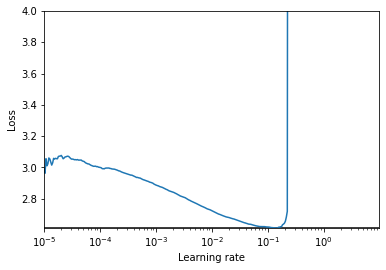

In [109]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [110]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [111]:
n_epochs = 15
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 7s 17ms/step - loss: 2.0517 - accuracy: 0.2866 - val_loss: 1.7439 - val_accuracy: 0.3886
Epoch 2/15
352/352 [==============================] - 6s 16ms/step - loss: 1.7630 - accuracy: 0.3756 - val_loss: 1.6773 - val_accuracy: 0.4146
Epoch 3/15
352/352 [==============================] - 6s 16ms/step - loss: 1.6187 - accuracy: 0.4246 - val_loss: 1.6202 - val_accuracy: 0.4270
Epoch 4/15
352/352 [==============================] - 6s 16ms/step - loss: 1.5396 - accuracy: 0.4549 - val_loss: 1.5883 - val_accuracy: 0.4528
Epoch 5/15
352/352 [==============================] - 6s 16ms/step - loss: 1.4904 - accuracy: 0.4733 - val_loss: 1.6234 - val_accuracy: 0.4366
Epoch 6/15
352/352 [==============================] - 6s 16ms/step - loss: 1.4478 - accuracy: 0.4874 - val_loss: 1.5639 - val_accuracy: 0.4498
Epoch 7/15
352/352 [==============================] - 6s 16ms/step - loss: 1.4115 - accuracy: 0.4996 - val_loss: 1.5837 - val_accuracy: 0.4502

One cycle allowed us to train the model in just 15 epochs, each taking only 6 seconds (thanks to the larger batch size). This is several times faster than the fastest model we trained so far. Moreover, we improved the model's performance (from 48.1% to 52.0%). The batch normalized model reaches a slightly better performance (53.6%), but it's much slower to train.